# Setup Experiment

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}
    
    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval, )

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x10e0d99e8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x10e0d9278>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import ConstantLearningRateScheduler
from mlp.penalties import L2Penalty

# Experiment

Epoch 1: 6.3s to complete
    error(train)=3.42e+00, acc(train)=1.18e-01, error(valid)=3.42e+00, acc(valid)=1.21e-01


Epoch 2: 5.9s to complete
    error(train)=3.31e+00, acc(train)=1.25e-01, error(valid)=3.31e+00, acc(valid)=1.27e-01


Epoch 3: 4.1s to complete
    error(train)=3.28e+00, acc(train)=1.35e-01, error(valid)=3.28e+00, acc(valid)=1.37e-01


Epoch 4: 6.2s to complete
    error(train)=3.27e+00, acc(train)=1.38e-01, error(valid)=3.27e+00, acc(valid)=1.38e-01


Epoch 5: 4.4s to complete
    error(train)=3.27e+00, acc(train)=1.33e-01, error(valid)=3.27e+00, acc(valid)=1.33e-01


Epoch 6: 4.8s to complete
    error(train)=3.26e+00, acc(train)=1.35e-01, error(valid)=3.26e+00, acc(valid)=1.36e-01


Epoch 7: 6.3s to complete
    error(train)=3.26e+00, acc(train)=1.31e-01, error(valid)=3.26e+00, acc(valid)=1.31e-01


Epoch 8: 3.8s to complete
    error(train)=3.26e+00, acc(train)=1.28e-01, error(valid)=3.26e+00, acc(valid)=1.29e-01


Epoch 9: 3.7s to complete
    error(train)=3.25e+00, acc(train)=1.31e-01, error(valid)=3.25e+00, acc(valid)=1.30e-01


Epoch 10: 3.8s to complete
    error(train)=3.25e+00, acc(train)=1.29e-01, error(valid)=3.25e+00, acc(valid)=1.27e-01


Epoch 11: 3.7s to complete
    error(train)=3.24e+00, acc(train)=1.27e-01, error(valid)=3.24e+00, acc(valid)=1.26e-01


Epoch 12: 4.6s to complete
    error(train)=3.25e+00, acc(train)=1.23e-01, error(valid)=3.25e+00, acc(valid)=1.24e-01


Epoch 13: 5.9s to complete
    error(train)=3.24e+00, acc(train)=1.22e-01, error(valid)=3.24e+00, acc(valid)=1.23e-01


Epoch 14: 9.6s to complete
    error(train)=3.24e+00, acc(train)=1.23e-01, error(valid)=3.24e+00, acc(valid)=1.23e-01


Epoch 15: 14.2s to complete
    error(train)=3.24e+00, acc(train)=1.25e-01, error(valid)=3.24e+00, acc(valid)=1.26e-01


Epoch 16: 17.3s to complete
    error(train)=3.24e+00, acc(train)=1.23e-01, error(valid)=3.24e+00, acc(valid)=1.24e-01


Epoch 17: 19.1s to complete
    error(train)=3.24e+00, acc(train)=1.20e-01, error(valid)=3.23e+00, acc(valid)=1.19e-01


Epoch 18: 20.2s to complete
    error(train)=3.23e+00, acc(train)=1.24e-01, error(valid)=3.23e+00, acc(valid)=1.23e-01


Epoch 19: 23.1s to complete
    error(train)=3.23e+00, acc(train)=1.17e-01, error(valid)=3.23e+00, acc(valid)=1.16e-01


Epoch 20: 21.2s to complete
    error(train)=3.23e+00, acc(train)=1.22e-01, error(valid)=3.23e+00, acc(valid)=1.23e-01


Epoch 21: 23.4s to complete
    error(train)=3.23e+00, acc(train)=1.20e-01, error(valid)=3.23e+00, acc(valid)=1.18e-01


Epoch 22: 22.7s to complete
    error(train)=3.23e+00, acc(train)=1.15e-01, error(valid)=3.23e+00, acc(valid)=1.14e-01


Epoch 23: 22.3s to complete
    error(train)=3.23e+00, acc(train)=1.22e-01, error(valid)=3.23e+00, acc(valid)=1.24e-01


Epoch 24: 20.6s to complete
    error(train)=3.23e+00, acc(train)=1.21e-01, error(valid)=3.22e+00, acc(valid)=1.22e-01


Epoch 25: 21.6s to complete
    error(train)=3.22e+00, acc(train)=1.21e-01, error(valid)=3.22e+00, acc(valid)=1.24e-01


Epoch 26: 20.2s to complete
    error(train)=3.22e+00, acc(train)=1.18e-01, error(valid)=3.22e+00, acc(valid)=1.19e-01


Epoch 27: 22.1s to complete
    error(train)=3.22e+00, acc(train)=1.21e-01, error(valid)=3.22e+00, acc(valid)=1.22e-01


Epoch 28: 24.0s to complete
    error(train)=3.22e+00, acc(train)=1.26e-01, error(valid)=3.22e+00, acc(valid)=1.23e-01


Epoch 29: 21.7s to complete
    error(train)=3.22e+00, acc(train)=1.23e-01, error(valid)=3.22e+00, acc(valid)=1.23e-01


Epoch 30: 21.1s to complete
    error(train)=3.22e+00, acc(train)=1.21e-01, error(valid)=3.22e+00, acc(valid)=1.26e-01


Epoch 31: 21.8s to complete
    error(train)=3.22e+00, acc(train)=1.27e-01, error(valid)=3.22e+00, acc(valid)=1.29e-01


Epoch 32: 21.3s to complete
    error(train)=3.22e+00, acc(train)=1.19e-01, error(valid)=3.22e+00, acc(valid)=1.20e-01


Epoch 33: 25.1s to complete
    error(train)=3.21e+00, acc(train)=1.20e-01, error(valid)=3.21e+00, acc(valid)=1.19e-01


Epoch 34: 22.3s to complete
    error(train)=3.21e+00, acc(train)=1.25e-01, error(valid)=3.21e+00, acc(valid)=1.26e-01


Epoch 35: 20.5s to complete
    error(train)=3.21e+00, acc(train)=1.19e-01, error(valid)=3.21e+00, acc(valid)=1.22e-01


Epoch 36: 19.7s to complete
    error(train)=3.21e+00, acc(train)=1.24e-01, error(valid)=3.21e+00, acc(valid)=1.25e-01


Epoch 37: 19.7s to complete
    error(train)=3.22e+00, acc(train)=1.21e-01, error(valid)=3.21e+00, acc(valid)=1.22e-01


Epoch 38: 19.6s to complete
    error(train)=3.21e+00, acc(train)=1.24e-01, error(valid)=3.21e+00, acc(valid)=1.24e-01


Epoch 39: 19.7s to complete
    error(train)=3.21e+00, acc(train)=1.23e-01, error(valid)=3.21e+00, acc(valid)=1.20e-01


Epoch 40: 20.4s to complete
    error(train)=3.21e+00, acc(train)=1.17e-01, error(valid)=3.21e+00, acc(valid)=1.19e-01



--------------------------------------------------------------------------------
coefficient=0.10
--------------------------------------------------------------------------------


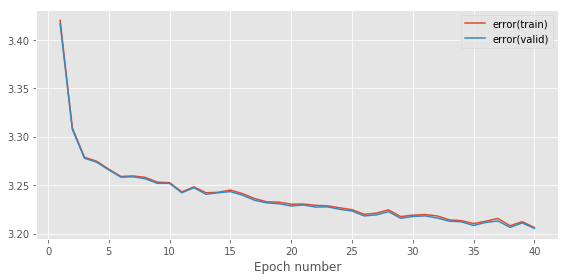

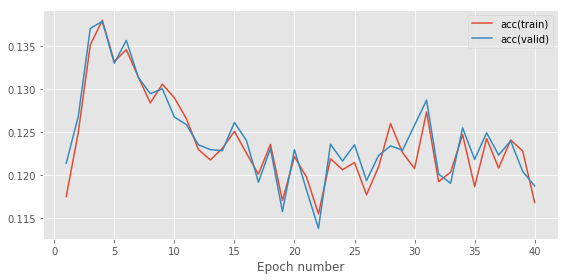

    final error(train) = 3.21e+00
    final error(valid) = 3.21e+00
    final acc(train)   = 1.17e-01
    final acc(valid)   = 1.19e-01
    run time per epoch = 19.00


Epoch 1: 4.5s to complete
    error(train)=1.30e+00, acc(train)=6.39e-01, error(valid)=1.31e+00, acc(valid)=6.39e-01


Epoch 2: 3.9s to complete
    error(train)=1.15e+00, acc(train)=6.80e-01, error(valid)=1.16e+00, acc(valid)=6.78e-01


Epoch 3: 4.5s to complete
    error(train)=1.06e+00, acc(train)=7.03e-01, error(valid)=1.07e+00, acc(valid)=6.97e-01


Epoch 4: 4.5s to complete
    error(train)=9.86e-01, acc(train)=7.22e-01, error(valid)=9.97e-01, acc(valid)=7.18e-01


Epoch 5: 4.2s to complete
    error(train)=9.32e-01, acc(train)=7.36e-01, error(valid)=9.45e-01, acc(valid)=7.31e-01


Epoch 6: 4.6s to complete
    error(train)=8.86e-01, acc(train)=7.48e-01, error(valid)=9.00e-01, acc(valid)=7.43e-01


Epoch 7: 3.7s to complete
    error(train)=8.51e-01, acc(train)=7.57e-01, error(valid)=8.67e-01, acc(valid)=7.51e-01


Epoch 8: 4.2s to complete
    error(train)=8.22e-01, acc(train)=7.64e-01, error(valid)=8.38e-01, acc(valid)=7.58e-01


Epoch 9: 3.8s to complete
    error(train)=7.95e-01, acc(train)=7.70e-01, error(valid)=8.13e-01, acc(valid)=7.62e-01


Epoch 10: 4.2s to complete
    error(train)=7.73e-01, acc(train)=7.75e-01, error(valid)=7.91e-01, acc(valid)=7.67e-01


Epoch 11: 3.9s to complete
    error(train)=7.52e-01, acc(train)=7.80e-01, error(valid)=7.72e-01, acc(valid)=7.74e-01


Epoch 12: 4.2s to complete
    error(train)=7.35e-01, acc(train)=7.84e-01, error(valid)=7.56e-01, acc(valid)=7.78e-01


Epoch 13: 4.0s to complete
    error(train)=7.18e-01, acc(train)=7.89e-01, error(valid)=7.41e-01, acc(valid)=7.82e-01


Epoch 14: 3.9s to complete
    error(train)=7.04e-01, acc(train)=7.92e-01, error(valid)=7.26e-01, acc(valid)=7.84e-01


Epoch 15: 4.3s to complete
    error(train)=6.91e-01, acc(train)=7.96e-01, error(valid)=7.13e-01, acc(valid)=7.90e-01


Epoch 16: 4.2s to complete
    error(train)=6.79e-01, acc(train)=7.99e-01, error(valid)=7.04e-01, acc(valid)=7.91e-01


Epoch 17: 4.4s to complete
    error(train)=6.69e-01, acc(train)=8.01e-01, error(valid)=6.95e-01, acc(valid)=7.96e-01


Epoch 18: 4.6s to complete
    error(train)=6.59e-01, acc(train)=8.04e-01, error(valid)=6.86e-01, acc(valid)=7.97e-01


Epoch 19: 5.9s to complete
    error(train)=6.51e-01, acc(train)=8.05e-01, error(valid)=6.78e-01, acc(valid)=7.97e-01


Epoch 20: 3.6s to complete
    error(train)=6.40e-01, acc(train)=8.08e-01, error(valid)=6.67e-01, acc(valid)=8.01e-01


Epoch 21: 3.8s to complete
    error(train)=6.30e-01, acc(train)=8.11e-01, error(valid)=6.60e-01, acc(valid)=8.03e-01


Epoch 22: 4.0s to complete
    error(train)=6.23e-01, acc(train)=8.13e-01, error(valid)=6.53e-01, acc(valid)=8.05e-01


Epoch 23: 3.9s to complete
    error(train)=6.17e-01, acc(train)=8.14e-01, error(valid)=6.48e-01, acc(valid)=8.05e-01


Epoch 24: 3.8s to complete
    error(train)=6.09e-01, acc(train)=8.17e-01, error(valid)=6.39e-01, acc(valid)=8.08e-01


Epoch 25: 3.7s to complete
    error(train)=6.03e-01, acc(train)=8.17e-01, error(valid)=6.34e-01, acc(valid)=8.08e-01


Epoch 26: 3.7s to complete
    error(train)=5.94e-01, acc(train)=8.21e-01, error(valid)=6.26e-01, acc(valid)=8.10e-01


Epoch 27: 3.6s to complete
    error(train)=5.90e-01, acc(train)=8.21e-01, error(valid)=6.24e-01, acc(valid)=8.11e-01


Epoch 28: 3.7s to complete
    error(train)=5.84e-01, acc(train)=8.23e-01, error(valid)=6.18e-01, acc(valid)=8.13e-01


Epoch 29: 3.6s to complete
    error(train)=5.77e-01, acc(train)=8.24e-01, error(valid)=6.11e-01, acc(valid)=8.13e-01


Epoch 30: 3.6s to complete
    error(train)=5.73e-01, acc(train)=8.26e-01, error(valid)=6.08e-01, acc(valid)=8.15e-01


Epoch 31: 3.6s to complete
    error(train)=5.67e-01, acc(train)=8.28e-01, error(valid)=6.02e-01, acc(valid)=8.17e-01


Epoch 32: 3.6s to complete
    error(train)=5.64e-01, acc(train)=8.27e-01, error(valid)=6.00e-01, acc(valid)=8.14e-01


Epoch 33: 3.6s to complete
    error(train)=5.61e-01, acc(train)=8.29e-01, error(valid)=5.97e-01, acc(valid)=8.18e-01


Epoch 34: 3.6s to complete
    error(train)=5.56e-01, acc(train)=8.30e-01, error(valid)=5.92e-01, acc(valid)=8.19e-01


Epoch 35: 4.8s to complete
    error(train)=5.52e-01, acc(train)=8.32e-01, error(valid)=5.90e-01, acc(valid)=8.19e-01


Epoch 36: 5.9s to complete
    error(train)=5.47e-01, acc(train)=8.32e-01, error(valid)=5.85e-01, acc(valid)=8.19e-01


Epoch 37: 6.5s to complete
    error(train)=5.43e-01, acc(train)=8.34e-01, error(valid)=5.80e-01, acc(valid)=8.20e-01


Epoch 38: 3.9s to complete
    error(train)=5.40e-01, acc(train)=8.34e-01, error(valid)=5.77e-01, acc(valid)=8.22e-01


Epoch 39: 4.2s to complete
    error(train)=5.38e-01, acc(train)=8.35e-01, error(valid)=5.76e-01, acc(valid)=8.22e-01


Epoch 40: 4.4s to complete
    error(train)=5.32e-01, acc(train)=8.35e-01, error(valid)=5.70e-01, acc(valid)=8.22e-01



--------------------------------------------------------------------------------
coefficient=0.00
--------------------------------------------------------------------------------


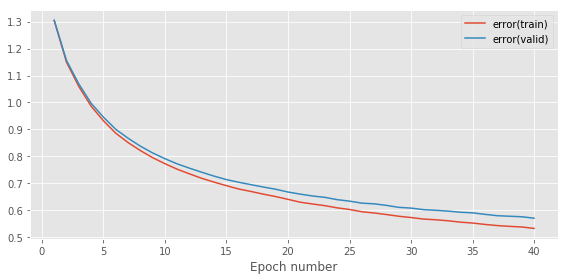

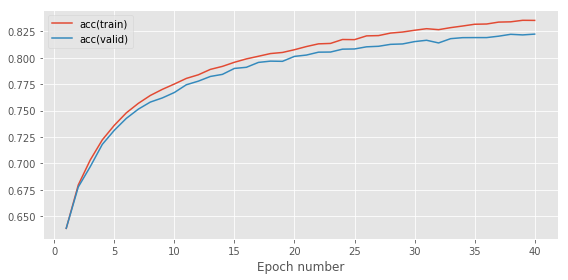

    final error(train) = 5.32e-01
    final error(valid) = 5.70e-01
    final acc(train)   = 8.35e-01
    final acc(valid)   = 8.22e-01
    run time per epoch = 5.61


In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

#setup hyperparameters
coefficients = [1e-1, 1e-3]
num_epochs = 40
stats_interval = 1
input_dim, output_dim, hidden_dim = 784, 47, 100
learning_rate = 1e-4

for coefficient in coefficients:

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    weights_penalty = L2Penalty(coefficient)
    
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weights_penalty=weights_penalty), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init, weights_penalty=weights_penalty), 
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weights_penalty=weights_penalty)
    ])

    scheduler = ConstantLearningRateScheduler(learning_rate)

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule(learning_rate=learning_rate, beta_1=0.9, beta_2=0.999)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
            model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "adam_l2_fig_1_" + str(learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)

    fig_2.tight_layout()
    fig_2_name = "adam_l2_fig_2_" + str(learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)

    print('-' * 80)
    print('coefficient={0:.2f}'
          .format(coefficient))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))
    